In [1]:
import pyreadr
import scanpy as sc
import numpy as np
import os
import pandas as pd
import anndata as ad
import scrublet as scr
from pathlib import Path

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

DPI = 300
FONTSIZE = 20  # 42

sc.settings.set_figure_params(
    scanpy=True, dpi=100, transparent=True, vector_friendly=True, dpi_save=DPI
)
from matplotlib import rcParams

rcParams["pdf.fonttype"] = 42

In [2]:
# where to save the file and filename to give
DIR2SAVE = Path("/data/BCI-CRC/nasrine/data/CRC/Metastatic_CRC_LM_dataset/scrublet_qc/")
DIR2SAVE.mkdir(parents=True, exist_ok=True)

scrublet_filename = "CRC_LM_decon_scrublet.txt"

# figures path to save
FIG2SAVE = DIR2SAVE.joinpath("figures/")
FIG2SAVE.mkdir(parents=True, exist_ok=True)
# set the global variable: sc.settings.figdir to save all plots
sc.settings.figdir = FIG2SAVE

In [3]:
adata = sc.read_h5ad(
    "/data/BCI-CRC/nasrine/data/CRC/Metastatic_CRC_LM_dataset/raw/CRC_LM_decon_raw.h5ad"
)

In [4]:
set(adata.obs.Tissue)

{'LM'}

### run scrublet per sample and on raw data
* When working with data from multiple samples, run Scrublet on each sample separately. Because Scrublet is designed to detect technical doublets formed by the random co-encapsulation of two cells, it may perform poorly on merged datasets where the cell type proportions are not representative of any single sample.

In [5]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,Sample,Patient,Therapy,Tissue,TSSEnrichment,nFrags,percent.mt,...,nCount_Peaks,nFeature_Peaks,nCount_ATAC,nFeature_ATAC,nCount_integratedRNADecon,nFeature_integratedRNADecon,RNA.weight,ATAC.weight,wsnn_res.0.5,Cell_subtype
CRC01_LM#AAACATGCATCAGCAC-1,SeuratProject,981,727,CRC01_LM,CRC01,NAC,LM,9.078,1890,3.771662,...,454,450,305,162,926.971718,704,0.296429,0.703571,3,No annotation
CRC01_LM#AACATAGCAGGATAAC-1,SeuratProject,461,365,CRC01_LM,CRC01,NAC,LM,6.041,1923,1.301518,...,442,441,251,133,432.982580,344,0.512933,0.487067,3,No annotation
CRC01_LM#AACTCACAGAATGACG-1,SeuratProject,1710,1363,CRC01_LM,CRC01,NAC,LM,15.662,1683,2.456140,...,460,456,387,195,1552.642975,1301,0.382379,0.617621,3,No annotation
CRC01_LM#AGAACAAGTGGTTATG-1,SeuratProject,1220,983,CRC01_LM,CRC01,NAC,LM,5.246,10832,2.377049,...,1760,1713,1102,573,1170.950610,957,0.465358,0.534642,18,No annotation
CRC01_LM#AGGTTGCGTGAGCAAG-1,SeuratProject,10885,5086,CRC01_LM,CRC01,NAC,LM,7.196,8739,2.351860,...,2909,2801,1966,1019,10480.888601,5010,0.977986,0.022014,14,No annotation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CRC15_LM#TTTCCGGGTAGGTTGC-1,SeuratProject,982,709,CRC15_LM,CRC15,NAC,LM,8.245,1543,3.767821,...,277,273,291,154,911.653883,680,0.168251,0.831749,15,No annotation
CRC15_LM#TTTGCGGAGTGAACAG-1,SeuratProject,1033,747,CRC15_LM,CRC15,NAC,LM,11.347,2734,4.549855,...,964,930,1125,560,943.988647,714,0.821833,0.178167,6,No annotation
CRC15_LM#TTTGTCTAGGTCCACA-1,SeuratProject,1110,806,CRC15_LM,CRC15,NAC,LM,10.594,1538,4.414414,...,355,352,356,192,974.865972,766,0.204801,0.795199,15,No annotation
CRC15_LM#TTTGTGAAGCATGAAG-1,SeuratProject,1142,810,CRC15_LM,CRC15,NAC,LM,5.428,9636,8.406305,...,1322,1280,1155,589,981.736507,776,0.503726,0.496274,6,No annotation


#### Check that the data is raw 

In [6]:
adata.X[1:5, 1:5].todense()

matrix([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32)

In [7]:
np.max(adata.X)

11459.0

#### run scrublet
scr.scrub_doublets() simulates doublets from the observed data and uses a k-nearest-neighbor classifier to calculate a continuous doublet_score (between 0 and 1) for each transcriptome. The score is automatically thresholded to generate predicted_doublets, a boolean array that is True for predicted doublets and False otherwise.

In [8]:
def run_scrublet(adata, sample_col="Sample", cellbarcode_index_name="level_1"):
    # create dict that stores scrublet results from each sample in adata
    scrublet_dict = {k: None for k in list(set(adata.obs[sample_col]))}

    # run scrublet per sample
    for sample in scrublet_dict.keys():
        print("Sample:", sample)
        adata_tmp = adata[adata.obs[sample_col] == sample].copy()
        scrub = scr.Scrublet(adata_tmp.X)
        (
            adata_tmp.obs["doublet_score"],
            adata_tmp.obs["predicted_doublet"],
        ) = scrub.scrub_doublets()
        scrub.plot_histogram()
        # sc.external.pp.scrublet(adata_tmp)
        scrublet_dict[sample] = adata_tmp.obs[
            ["Sample", "doublet_score", "predicted_doublet"]
        ]
        # sc.external.pl.scrublet_score_distribution(adata_tmp)

    # Put all scores in a single panda dataframe
    scrublet_concat = (
        pd.concat(scrublet_dict, axis=0)
        .reset_index()
        .drop(labels="level_0", axis=1)
        .set_index(cellbarcode_index_name)
    )

    return scrublet_concat

In [9]:
adata.obs.index

Index(['CRC01_LM#AAACATGCATCAGCAC-1', 'CRC01_LM#AACATAGCAGGATAAC-1',
       'CRC01_LM#AACTCACAGAATGACG-1', 'CRC01_LM#AGAACAAGTGGTTATG-1',
       'CRC01_LM#AGGTTGCGTGAGCAAG-1', 'CRC01_LM#ATCGCCCGTGCATTTC-1',
       'CRC01_LM#ATCTATGAGTAACGGA-1', 'CRC01_LM#CACCTCAGTGGTTATG-1',
       'CRC01_LM#CTAAGGTTCCTTGCGT-1', 'CRC01_LM#CTTGTAAAGTCAATCA-1',
       ...
       'CRC15_LM#TTGTTCCCAACCCTAA-1', 'CRC15_LM#TTTAAGCCAAACCTAT-1',
       'CRC15_LM#TTTACGCGTAGCTGGT-1', 'CRC15_LM#TTTCATCAGAAGGTGC-1',
       'CRC15_LM#TTTCCGGGTACGTTTC-1', 'CRC15_LM#TTTCCGGGTAGGTTGC-1',
       'CRC15_LM#TTTGCGGAGTGAACAG-1', 'CRC15_LM#TTTGTCTAGGTCCACA-1',
       'CRC15_LM#TTTGTGAAGCATGAAG-1', 'CRC15_LM#TTTGTGAAGGAGCATA-1'],
      dtype='object', length=5345)

In [10]:
adata.obs["decontX_contamination"]

CRC01_LM#AAACATGCATCAGCAC-1    0.001115
CRC01_LM#AACATAGCAGGATAAC-1    0.002359
CRC01_LM#AACTCACAGAATGACG-1    0.011868
CRC01_LM#AGAACAAGTGGTTATG-1    0.000901
CRC01_LM#AGGTTGCGTGAGCAAG-1    0.000203
                                 ...   
CRC15_LM#TTTCCGGGTAGGTTGC-1    0.002577
CRC15_LM#TTTGCGGAGTGAACAG-1    0.010565
CRC15_LM#TTTGTCTAGGTCCACA-1    0.040572
CRC15_LM#TTTGTGAAGCATGAAG-1    0.036592
CRC15_LM#TTTGTGAAGGAGCATA-1    0.065371
Name: decontX_contamination, Length: 5345, dtype: float64

In [11]:
adata.obs.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Sample', 'Patient',
       'Therapy', 'Tissue', 'TSSEnrichment', 'nFrags', 'percent.mt',
       'percent.ribo', 'RNA_snn_res.0.5', 'seurat_clusters',
       'integrated_snn_res.0.5', 'Clusters_all_cells_preDecon',
       'Cell_type_preDecon', 'ident', 'decontX_contamination',
       'decontX_clusters', 'integratedRNADecon_snn_res.0.5', 'X_scvi_batch',
       'X_scvi_labels', 'leiden', 'Cell_type', 'nCount_Peaks',
       'nFeature_Peaks', 'nCount_ATAC', 'nFeature_ATAC',
       'nCount_integratedRNADecon', 'nFeature_integratedRNADecon',
       'RNA.weight', 'ATAC.weight', 'wsnn_res.0.5', 'Cell_subtype'],
      dtype='object')

In [13]:
# rename our nCount_RNA etc.. for later to merge the datasources

adata.obs.rename(
    columns={
        "nCount_RNA": "total_counts",
        "nFeature_RNA": "n_genes_by_counts",
        "percent.mt": "pct_counts_mt",
        "percent.ribo": "pct_counts_ribo",
        "decontX_contamination": "doublet_score",
    },
    inplace=True,
)

In [14]:
adata.obs.columns

Index(['orig.ident', 'total_counts', 'n_genes_by_counts', 'Sample', 'Patient',
       'Therapy', 'Tissue', 'TSSEnrichment', 'nFrags', 'pct_counts_mt',
       'pct_counts_ribo', 'RNA_snn_res.0.5', 'seurat_clusters',
       'integrated_snn_res.0.5', 'Clusters_all_cells_preDecon',
       'Cell_type_preDecon', 'ident', 'doublet_score', 'decontX_clusters',
       'integratedRNADecon_snn_res.0.5', 'X_scvi_batch', 'X_scvi_labels',
       'leiden', 'Cell_type', 'nCount_Peaks', 'nFeature_Peaks', 'nCount_ATAC',
       'nFeature_ATAC', 'nCount_integratedRNADecon',
       'nFeature_integratedRNADecon', 'RNA.weight', 'ATAC.weight',
       'wsnn_res.0.5', 'Cell_subtype'],
      dtype='object')

### Quality control

Data quality control can be split into cell QC and gene QC. Typical quality measures for assessing the quality of a cell include the number of molecule counts (UMIs), the number of expressed genes, and the fraction of counts that are mitochondrial. A high fraction of mitochondrial reads being picked up can indicate cell stress, as there is a low proportion of nuclear mRNA in the cell. It should be noted that high mitochondrial RNA fractions can also be biological signals indicating elevated respiration.

In [15]:
print(
    adata.obs[
        ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"]
    ].describe()
)

# print(adata.var[["n_cells_by_counts", "total_counts"]].describe())

       n_genes_by_counts   total_counts  pct_counts_mt  pct_counts_ribo
count        5345.000000    5345.000000    5345.000000      5345.000000
mean         1732.350234    3807.768195       4.271053         3.425424
std          1123.329924    5029.480225       2.801661         2.479981
min           328.000000     393.000000       0.063980         0.167926
25%           950.000000    1413.000000       1.802403         1.659514
50%          1421.000000    2394.000000       3.900310         2.879213
75%          2216.000000    4525.000000       6.569759         4.586466
max         12886.000000  114650.000000       9.991236        24.228466


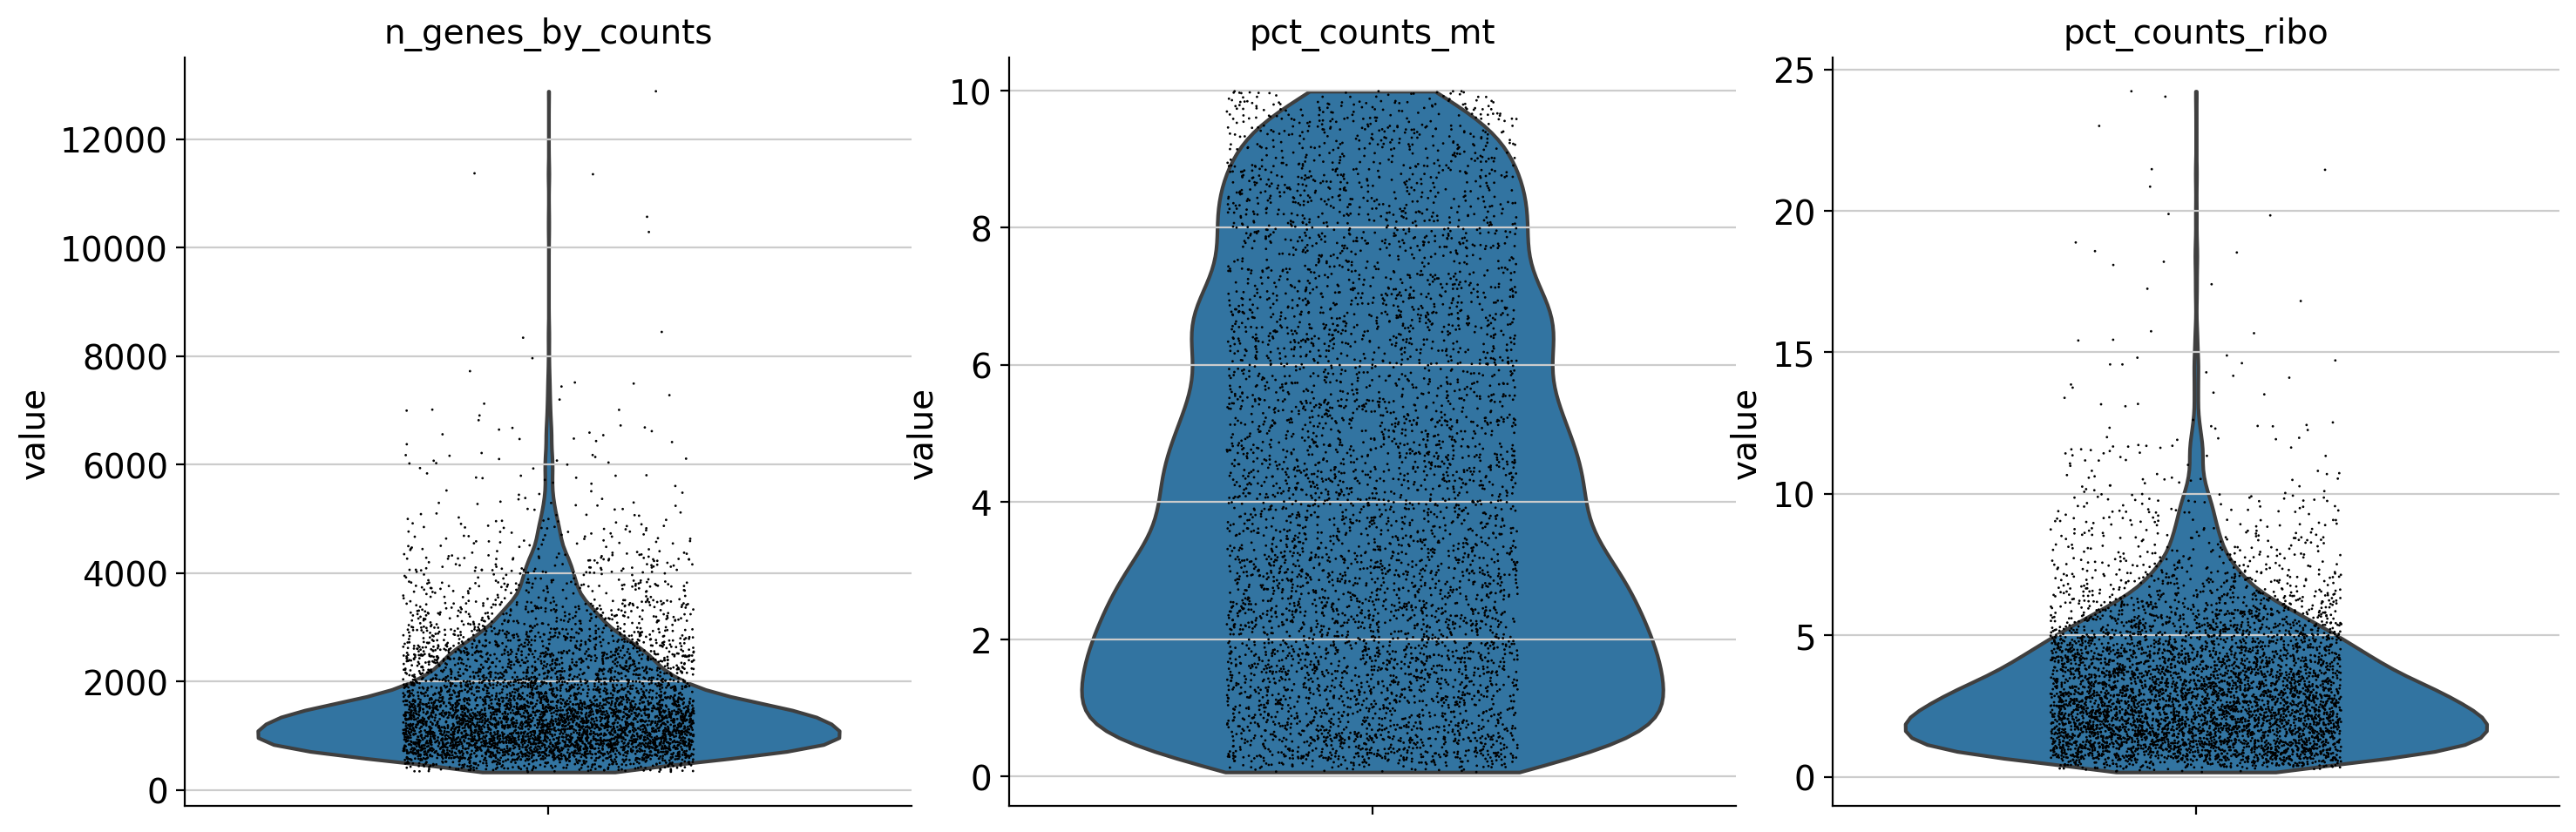

In [16]:
# violin plot of some distributions
sc.pl.violin(
    adata,
    keys=["n_genes_by_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.2,
    multi_panel=True,
    rotation=30,
    save="CRC_LM_decon_QC_covariates.pdf",
    show=True,
)

#### Filter cells according to identified QC thresholds:

* set threshold MT percent to 10%
* remove ribosomal and mitochondrial genes 
* remove cells with less than 300 genes

### Save to file 

In [17]:
adata.write(DIR2SAVE.joinpath("CRC_LM_decon_raw_scrublet_qc.h5ad"))

In [18]:
adata = sc.read_h5ad(DIR2SAVE.joinpath("CRC_LM_decon_raw_scrublet_qc.h5ad"))

In [19]:
len(set(adata.obs.Patient))

15

In [20]:
adata.obs[["Therapy", "Patient"]].drop_duplicates(
    subset=["Therapy", "Patient"], inplace=False
).groupby("Therapy").size()

Therapy
NAC       5
naive    10
dtype: int64

In [21]:
adata.shape

(5345, 36485)